In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime as dt
from IPython.display import Image

In [2]:
fifa_vi = pd.read_csv("fifa_variable_information.csv")
fifa = pd.read_csv("fifa.csv")

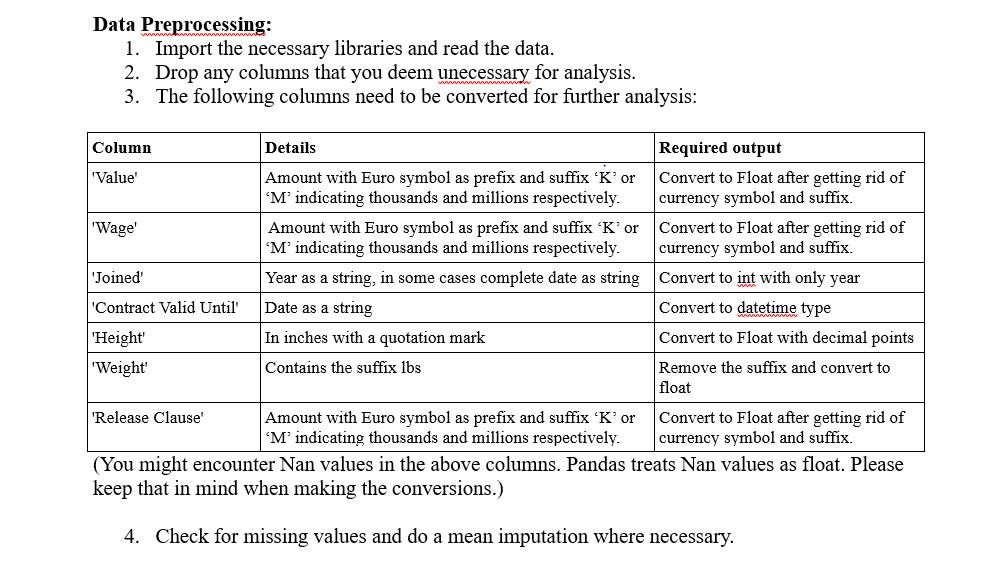

In [3]:
 Image('1.jpg')

In [4]:
fifa.shape

(18207, 60)

In [5]:
fifa[["Release Clause","Value","Wage","Joined","Height","Weight","Contract Valid Until"]].isnull().sum()

Release Clause          1564
Value                      0
Wage                       0
Joined                  1553
Height                    48
Weight                    48
Contract Valid Until     289
dtype: int64

In [6]:
def convert(a):
    if not isinstance(a, float):
        a=a.replace("€","")
        if  a[len(a)-1] =="M":
            b=a.replace("M","")
            return (float(b)*1000000)
        elif a[len(a)-1] =="K":
            b=a.replace("K","")
            return (float(b)*1000)
        else:
            return float(a)
    else:
            return float(a)

fifa["Value"] =fifa["Value"].apply(convert )
fifa['Wage'] = fifa['Wage'].apply(convert )
fifa["Release Clause"] =fifa["Release Clause"].apply(convert)

In [7]:
def joined(a):
    if not isinstance(a, float):
        return int(a[-4:])
    else:
        return 0
fifa["Joined"] = fifa["Joined"].apply(joined)

In [8]:
def height(a):
    if not isinstance(a, float):
        return float(a.replace("'" ,"."))
    else:
        return 0.0
fifa["Height"] = fifa["Height"].apply(height)
# fifa["Height"].fillna(fifa["Height"].mean())
# df["B"].fillna( df["B"].mean())

In [9]:
def weight(a):
    if not isinstance(a, float):
        return float(a.replace("lbs",""))
    else:
        return 0.0
fifa["Weight"] =fifa["Weight"].apply(weight)

In [10]:
def Contract(a):
    if not isinstance(a, float):
        if len(a)==4:
            return (dt.strptime(a,"%Y").year)
        else:
            return (dt.strptime(a, "%b %d, %Y").year)
fifa["Contract Valid Until"]=fifa["Contract Valid Until"].apply(Contract)

In [11]:
fifa["Release Clause"] =fifa["Release Clause"].fillna(fifa["Release Clause"].mean())

In [12]:
fifa["Contract Valid Until"] =fifa["Contract Valid Until"].fillna(round(fifa["Contract Valid Until"].mean()))

In [13]:
fifa[["Release Clause","Value","Wage","Joined","Height","Weight","Contract Valid Until"]].isnull().sum()

Release Clause          0
Value                   0
Wage                    0
Joined                  0
Height                  0
Weight                  0
Contract Valid Until    0
dtype: int64

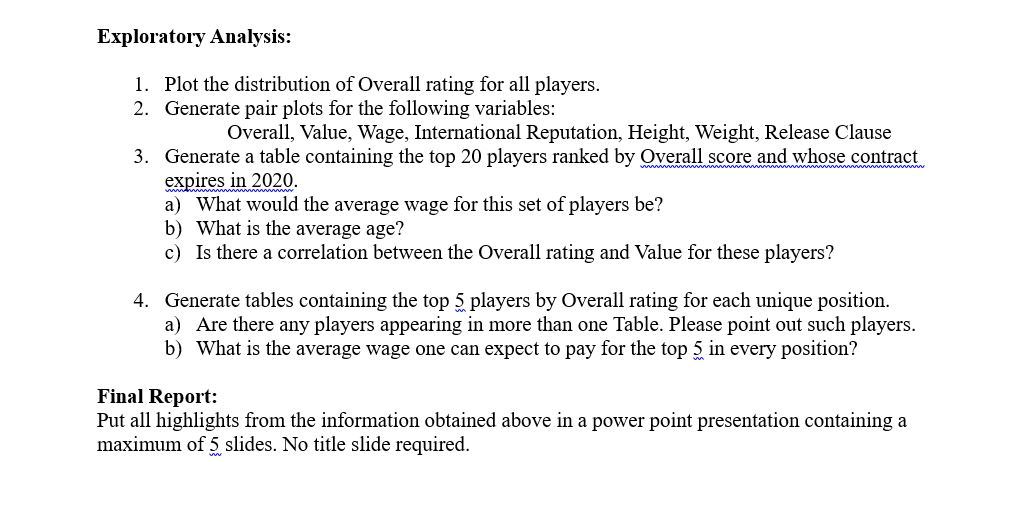

In [14]:
Image('2.jpg')

In [15]:
fifa.drop(["Photo","Nationality", "Flag", "Club", "Club Logo", "Jersey Number"], axis = 1,inplace=True)

### 	1. Plot the distribution of Overall rating for all players. 


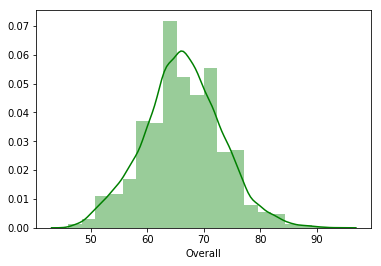

In [16]:
sns.distplot (fifa["Overall"],bins=20,color="green")
plt.show()

### 2.	Generate pair plots for the following variables:
**Overall, Value, Wage, International Reputation, Height, Weight, Release Clause**


C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


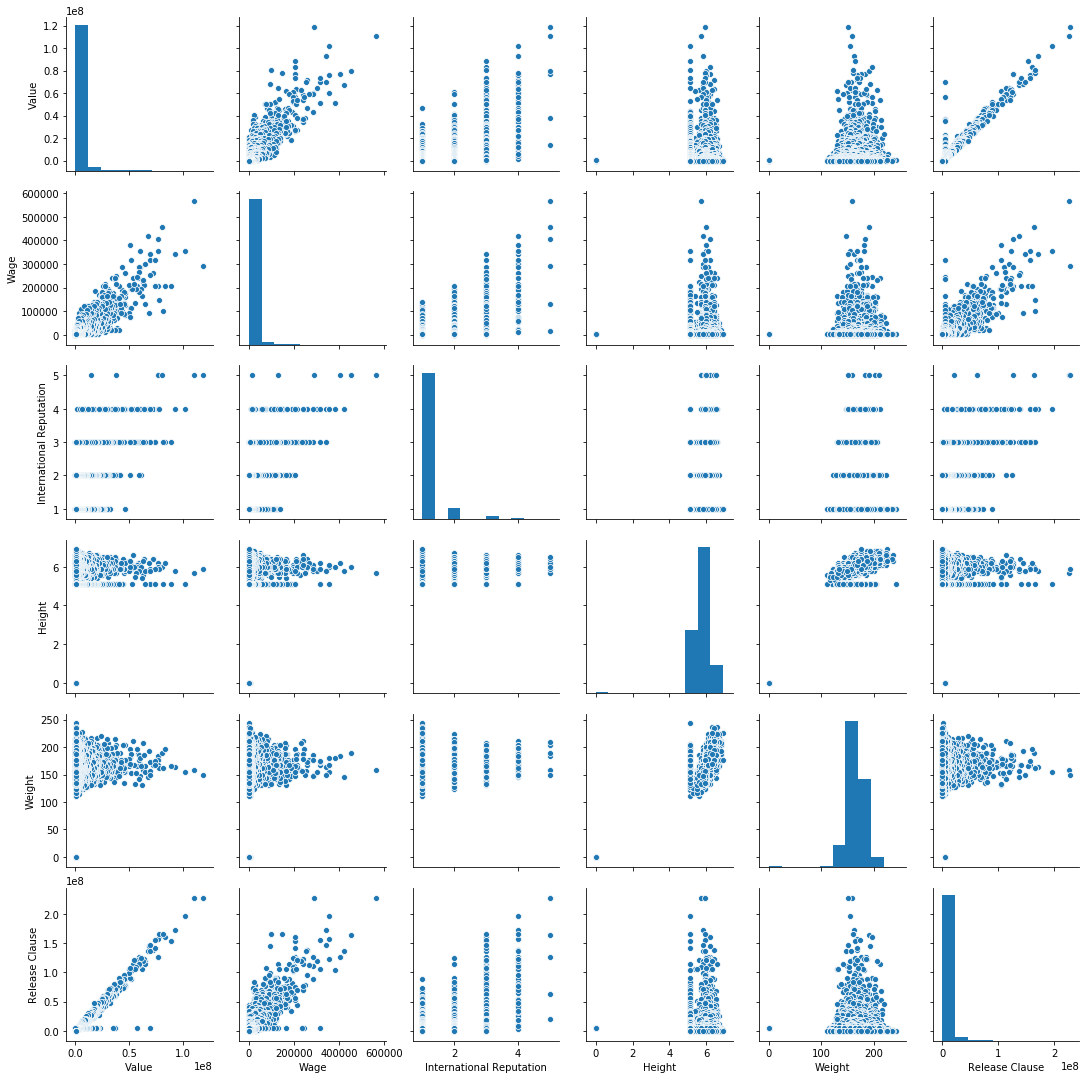

In [17]:
sns.pairplot(fifa[ ['Value', 'Wage', 'International Reputation','Height',  'Weight','Release Clause' ]])
plt.show()

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
    a)	What would the average wage for this set of players be?
    b)	What is the average age?
    c)	Is there a correlation between the Overall rating and Value for these players?


In [19]:
fifa_20 =fifa[fifa["Contract Valid Until"]==2020].sort_values(by = "Overall" ,ascending=False) .reset_index(drop=True).iloc[:20]
fifa_20.shape

(20, 54)

##### a)    What would the average wage for this set of players be?

In [20]:
fifa_20["Wage"].mean()

205450.0

##### b)    What is the average age?

In [21]:
fifa_20["Age"].mean()

30.65

##### c)    Is there a correlation between the Overall rating and Value for these players?

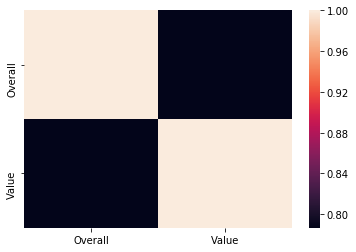

In [22]:
co= fifa_20[["Overall","Value"]].corr()
sns.heatmap(co)
plt.show()

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
    a)	Are there any players appearing in more than one Table. Please point out such players.
    b)	What is the average wage one can expect to pay for the top 5 in every position?


In [23]:
a=fifa["Position"].dropna().unique()
overall = pd.DataFrame( columns= fifa.columns)
temp = pd.DataFrame( columns= fifa.columns)
for i in a:
    temp=  fifa[fifa["Position"]==i].sort_values(by = "Overall" ,ascending=False) .reset_index(drop=True).iloc[0:5,]
    overall= pd.concat([overall,temp])

In [24]:
overall["Position"].value_counts()

RDM    5
RCB    5
CAM    5
LB     5
LAM    5
CM     5
LCM    5
RS     5
CDM    5
LM     5
RB     5
CB     5
GK     5
LWB    5
ST     5
LCB    5
LF     5
LDM    5
RCM    5
RWB    5
LS     5
RF     5
RW     5
CF     5
RM     5
LW     5
RAM    5
Name: Position, dtype: int64

##### a)    Are there any players appearing in more than one Table. Please point out such players.

There are no such players

In [25]:
overall["Name"].value_counts()>1

P. Kadeřábek         False
J. Kimmich           False
Nicolás Formido      False
Sergio Busquets      False
D. Caligiuri         False
L. Messi             False
Alex Sandro          False
Marquinhos           False
R. Mahrez            False
L. Modrić            False
N. Kanté             False
M. Reus              False
M. Pjanić            False
Jorginho             False
Casemiro             False
M. Verratti          False
A. Griezmann         False
Granell              False
A. Sánchez           False
J. Hector            False
S. Zaza              False
M. Salah             False
Filipe Luís          False
Illarramendi         False
Thiago               False
I. Gündoğan          False
K. Walker            False
Azpilicueta          False
Lucas Leiva          False
D. Mertens           False
                     ...  
K. Mbappé            False
Allan Bardinho       False
N. Otamendi          False
Gerard Moreno        False
P. Dybala            False
Cristiano Ronaldo    False
P

##### b)    What is the average wage one can expect to pay for the top 5 in every position?

In [26]:
overall.groupby(by="Position")["Wage"].mean()

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

#### Creating DF dynamically

In [28]:
a=fifa["Position"].dropna().unique()
overall = pd.DataFrame( columns= fifa.columns)
temp = pd.DataFrame( columns= fifa.columns)
for i in a:
    globals()[str(i)]=  fifa[fifa["Position"]==i].sort_values(by = "Overall" ,ascending=False) .reset_index(drop=True).iloc[0:5,]


In [29]:
a

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [30]:
RF

,ID,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,175943,D. Mertens,31,87,87,45000000.0,135000.0,Right,3.0,4.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0
2,172114,D. Valeri,32,80,80,11500000.0,12000.0,Right,2.0,3.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17300000.0
3,150516,L. Podolski,33,78,78,6500000.0,11000.0,Left,3.0,3.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8100000.0
4,201313,C. Ciano,28,75,75,6500000.0,17000.0,Left,1.0,4.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0
